# Représentation et caractérisation des échantillons de données

Généralement, les données collectées lors d'une expérience sont nombreuses.
Par exemple, les relevés météorologiques permettant la prédiction de la météo du lendemain sont à la fois fréquentes (plusieurs relevés par heure) et variées (plusieurs mesures faites).
Le tableau ci-dessous montre une partie des données météorologiques relevée sur Paris le 13 septembre 2020, extraite du site [MeteoBlue](https://www.meteoblue.com).

| Temps         | Température (Celsius) | Humidité relative (%) | Pression (hPa) |
|---------------|-----------------------|-----------------------|----------------|
| 20200913T0000 | 17.886375             | 66.0                  | 1023.8         |
| 20200913T0100 | 16.866377             | 72.0                  | 1023.8         |
| 20200913T0200 | 16.226376             | 75.0                  | 1024.4         |
| 20200913T0300 | 15.726377             | 77.0                  | 1024.4         |
| 20200913T0400 | 15.236376             | 80.0                  | 1023.8         |
| 20200913T0500 | 14.7663765            | 81.0                  | 1023.5         |
| 20200913T0600 | 14.336376             | 83.0                  | 1023.7         |
| 20200913T0700 | 13.906376             | 84.0                  | 1024.3         |
| 20200913T0800 | 13.836376             | 83.0                  | 1024.8         |
| 20200913T0900 | 15.116376             | 78.0                  | 1025.1         |
| 20200913T1000 | 17.036377             | 71.0                  | 1025.3         |
| 20200913T1100 | 19.866377             | 63.0                  | 1025.1         |
| 20200913T1200 | 22.496376             | 51.0                  | 1024.8         |
| 20200913T1300 | 24.236376             | 42.0                  | 1024.6         |
| 20200913T1400 | 24.416376             | 37.0                  | 1024.7         |
| 20200913T1500 | 25.706377             | 33.0                  | 1024.2         |
| 20200913T1600 | 26.776377             | 31.0                  | 1023.6         |
| 20200913T1700 | 27.576376             | 29.0                  | 1023.2         |
| 20200913T1800 | 28.016376             | 27.0                  | 1022.4         |
| 20200913T1900 | 27.866377             | 28.0                  | 1022.4         |
| 20200913T2000 | 27.316376             | 29.0                  | 1022.4         |
| 20200913T2100 | 26.496376             | 30.0                  | 1022.9         |
| 20200913T2200 | 25.496376             | 30.0                  | 1023.4         |
| 20200913T2300 | 24.046375             | 30.0                  | 1023.1         |

Utilisé seulement des tables de données brutes pour extraire des comportements globaux (comme l'évolution de la pression durant la journée) est souvent très difficiles; il est alors utile de trouver des représentations des données brutes plus visuelles ou bien permettant de réduire la complexité en quelques nombres-clés.

## Représentation graphique

Une première façon simple consiste à représenter des données sous forme de graphique.
On pourra consulter la section \ref{app:matplotlib} pour des exemples de code pour créer les graphiques suivants.
Faisons une représentation temporelle des données.

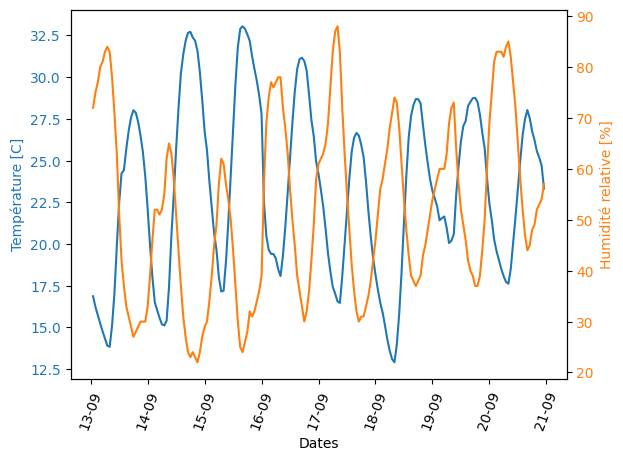

In [18]:
import matplotlib.pyplot as plt # importer matplotlib
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd
import numpy as np

# Lire le fichier depuis internet (on sautera les 10 premières lignes)
url='https://github.com/guiguem/physexp2/releases/download/v1/meteo.csv'
df =  pd.read_csv(url, header=10)
# Extraction des dates des mesures
dates = df[df.columns[0]].to_list()
date_objects = [datetime.strptime(date, '%Y%m%dT%H%M') for date in dates]
# Extraction des valeurs de températeurs, d'hygrométrie et de pression (on utilise `pd.to_numeric` pour convertir en valeurs numériques)
temperatures = pd.to_numeric(df[df.columns[1]]).to_list()
hygrometries = pd.to_numeric(df[df.columns[2]]).to_list()
pressures = pd.to_numeric(df[df.columns[3]]).to_list()

# On prépare la figure
fig, ax = plt.subplots()
plt.xticks(rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d%m"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%d%m"))
ax.tick_params(axis='y', labelcolor="C0") # plot de y1 vs x
ax.set_ylabel("Température [C]", color="C0")
ax.set_xlabel("Dates", color="black")
# On affiche les données sur ce deuxième axe
ax.plot(date_objects,temperatures,"-", color="C0")

# On créé un second axe pour l'humidité
ax2 = ax.twinx()
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%d-%m"))
ax2.xaxis.set_minor_formatter(mdates.DateFormatter("%d-%m"))
ax2.tick_params(axis='y', labelcolor="C1")
ax2.set_ylabel('Humidité relative [%]', color="C1")
# On affiche les données sur ce deuxième axe
ax2.plot(date_objects, hygrometries, color="C1")

Ce type de représentation permet d'étudier graphiquement les similarités de variations temporelles des quantités physiques (ici la temperature et l'humidité) et comment elles évoluent dans le temps. Une autre représentation consiste à afficher simplement chaque mesures par couple (i.e. en un instant donné) comme sur la figure suivante.

In [ ]:
fig, ax = plt.subplots()
color = 'tab:blue'
ax.plot(hygrometries,temperatures,"x")
ax.set_ylabel("Température [C]")  # we already handled the x-label with ax1
ax.set_xlabel("Humidité relative [%]")  # we already handled the x-label with ax1

Ce type de graphique permet de bien observer que, par exemple, lorsque la température diminue, l'humidité relative a tendance à augmenter et permet de mettre en évidence une **corrélation** entre ces deux quantités.

Enfin une dernière représentation intéressante est l'**histogramme**.
Pour construire un histogramme, on se donne une liste d'intervalles ou **classes** (en anglais, on parle souvent de **bin**.) couvrant toutes les valeurs mesurées et on va compter le nombre de fois que les valeurs issues de la mesure tombe dans un de ces intervalles.
Par exemple, si l'on s'intéresse à la température, on peut créer des intervalles de largeur $2^{\circ}\mathrm{C}$ et ranger chaque valeur dans ces intervalles.
Si on représente la quantité de mesures dans chaque intervalle, on obtient la figure ci-dessous.

In [ ]:
fig, ax = plt.subplots()
bins_list = [10+2*i for i in range(0,14)]
n, bins, patches = plt.hist(temperatures, bins = bins_list, alpha=0.75)
ax.set_xlabel("Température [C]")  # we already handled the x-label with ax1
bin_max = int(np.where(n == n.max())[0])
mode_temp = ( bins[bin_max] + bins[bin_max+1] ) /2.

Les classes utilisées pour cet histogramme sont (en degrés Celsius): $\left[10, 12\right]$, $\left[12, 14\right]$, ... and $\left[34, 36\right]$.
Notons que chaque classe est alors définie par une borne supérieure et inférieure, ainsi qu'un centre.
Cela permet d'estimer les propriétés de localisation et de dispersion des mesures ou bien évaluer le caractère aléatoire des données.

(content:chap1:moyenne-ecart-types)=
## Moyenne et écart-types

Les statistiques consistent à inférer les propriétés des probabilités sous-jacentes aux mesures physiques à partir de celles-ci.
Les représentations graphiques sont un moyen visuel de le faire.
Cependant, il est parfois utile de définir plusieurs grandeurs permettant de caractériser la distribution des données.

### Mesure de position

Une des mesures de position les plus connues est la **moyenne** de l'échantillon $\left\{x_i\right\}_{i\in \left\{1,n\right\}}$:

$$ 
\overline{x} = \frac{1}{n}\left( x_1+x_2+...+x_n \right) = \frac{1}{n}\sum _{i=1}^n x_i.
$$ (def-moyenne)

Par exemple, on peut calculer la moyenne des températures de la semaine 38 de 2020.

In [ ]:
print("La température moyenne vaut {:.2f} C".format(np.mean(temperatures)))

On peut aussi utiliser la **médiane** pour un échantillon ordonné, qui correspond à la valeur qui sépare l'échantillon en deux parties de même taille.
Si la taille de l'échantillon est impaire, alors la médiane est forcément égale à un des éléments de l'échantillon : par exemple, pour l'échantillon $\left[ 1, 3, 5, 7, 9 \right]$, la médiane est $5$.
En revanche, si la taille est paire, la médiane correspond à la moyenne arithmétique de deux éléments: par exemple, pour l'échantillon $\left[ 1, 3, 5, 7 \right]$, la médiane est $\frac{1}{2}\left( 3+5\right) = 4$.
Calculons la médiane dans le cas de nos températures.

In [ ]:
print("La température médiane vaut {:.2f} C".format(np.median(temperatures)))

On voit que celle-ci est proche de la moyenne, mais pas égale.
Cette similarité est due à la distribution assez symétrique des données autour de la moyenne sur l'histogramme des températures.

Enfin, le **mode** correspond à la valeur qui a été obtenue le plus de fois.
Cette valeur naturellement n'existe que pour des valeurs discrètes (comme pour un lancer de dé): par exemple, dans l'échantillon $\left\{1, 2, 1, 3, 1, 5, 2\right\}$, le mode est $1$.
Cependant, pour un échantillon de valeurs continues comme la température, il est possible de l'extraire en définissant d'abord un histogramme, puis en prenant la valeur du centre de la classe qui contient le plus d'élément.

In [ ]:
print("Le mode des températures vaut {:.0f} C".format(mode_temp))

### Mesure de dispersion

Comme les mesures de position permettent de réduire la distribution en une quantité numérique, les mesures de dispersions permettent de caractériser l'étalement des données autour d'une valeur particulière : généralement on considère l'étalement autour de la valeur moyenne.

La **variance** de l'échantillon autour de sa moyenne est définie par:

$$
var(x) = \sigma ^2 = \frac{1}{n}\sum _i (x_i - \overline{x})^2.
$$ (def-variance-stats)

La variance est la moyenne des écarts à la moyenne.
Effectivement, il est parfois utile de la réécrire sous la forme:

$$var(x) = = \frac{1}{n}\sum _i x_i ^2 + \frac{1}{n} \sum _i \overline{x}^2 - \frac{2}{n}\sum _i x_i \times \overline{x} = \frac{1}{n}\sum _i x_i ^2 - \frac{1}{n} \sum _i \overline{x}^2 = \overline{x^2} - \overline{x}^2.$$

La racine carrée de la variance est appelée **écart-type** et notée souvent $\sigma$.
L'écart-type caractérise la dispersion des valeurs de l'échantillon autour de la valeur moyenne et est fréquemment utilisé pour estimer une incertitude de mesure (nous y reviendrons dans le chapitre 2).
Cette caractéristique s'applique bien à l'échantillon des températures.

In [ ]:
print("L'écart-type vaut {:.2f} C".format(np.std(temperatures)))

On peut aussi définir l'**espace interquantile** qui généralise la notion de médiane : les premier et troisième quantiles $q_1$ et $q_3$ définissent les valeurs qui définissent respectivement les premier et troisième quarts de l'échantillon ordonné.
On a donc un quart des données plus petites que $q_1$, la moitié entre $q_1$ et $q_3$ et un dernier quart plus grandes que $q_3$: on définit donc $\delta q = q_3 - q_1$ la distance interquantile: il s'agit bien d'une mesure de la dispersion des données (autour de la médiane cette fois-ci).
On eput donc calculer les quantiles comme ci-dessous.

In [ ]:
quantiles = np.quantile(temperatures, [0.25, 0.75])
print("Le premier quantile est à {:.2f} C".format(quantiles[0]))
print("Le troisième quantile est à {:.2f} C".format(quantiles[1]))
print("La distance interquantile vaut {:.2f} C".format(quantiles[1] - quantiles[0]))

## Covariance et corrélations

La **covariance** est une généralisation de la variance des échantillons contenant plusieurs grandeurs pour chaque mesure (comme celle de la température et de l'humidité) et vaut pour un échantillon constitué de $n$ couples $(x_i,y_i)$ :

$$cov(x,y) = \frac{1}{n} \sum _i (x_i - \overline{x})(y_i - \overline{y}) = \overline{xy} - \overline{x}\times\overline{y}.$$

On a bien $cov(x,x) = var(x) = \sigma _x^2$ et $cov(y,y) = var(y) = \sigma _y^2$.

On peut alors définir le **coefficient de corrélation** $\rho$ tel que:

$$\rho = \frac{cov(x,y)}{\sigma_x\sigma_y}.$$

Ce nombre compris entre -1 et 1 définit le niveau de corrélation entre les deux grandeurs $x$ et $y$: un échantillon est entièrement corrélé si $\rho = 1$, entièrement décorrélé si $\rho = -1$ et décorrélé si $\rho = 0$.

Par exemple, on peut calculer le coefficient de corrélation entre la température et l'humidité relative de la semaine 38 de 2020.

In [ ]:
corr = np.corrcoef(temperatures, hygrometries)[0][1]
print("Le coefficient de corrélation entre la température et l'humidité vaut {:.2f}".format(corr))

On observe une anti-corrélation assez forte que l'on peut voir sur le graphe de la température en fonction de l'humidité relative.

Un point important à noter est qu'avoir un coefficient de corrélation nul ne signifie pas que les deux grandeurs sont indépendantes, comme sur la figure suivante.
![Alt](correlation-example.png)
En effet, la notion d'indépendance entre deux grandeurs est généralement trop complexe pour être apparente avec une réduction à un seul nombre.


```{exercise} 
:label: stats-meteo
Nous allons caractériser la distribution de mesures de température et de pression avec des grandeurs statistiques comme la moyenne $\mu$, la variance $\sigma ^2$, l'asymmétrie $S$ (*skew* en anglais) et l'applatissement $K$ (*kurtosis* en anglais):

$$ S = \frac{1}{N}\sum _{i=0} ^N \left(\frac{x_i - \mu}{\sigma}\right)^3 $$

$$ = \frac{\frac{1}{N}\sum _{i=0} ^N \left(x_i\right)^3 - 3\mu\sigma^2 - \mu^3 }{\sigma ^3} $$ (def-skew)

$$ K = \frac{1}{N}\sum _{i=0} ^N \left(\frac{x_i - \mu}{\sigma}\right)^4 $$ (def-kurtosis)

Les données se trouvent dans le fichier "meteo.csv" utilisé plus haut.

1.  Lire les données en utilisant \pyv{pandas} et extraire les données de température et de pression.
    Représenter les données de pression sous la forme d'un histogramme.
2.  En utilisant les équations {eq}`def-moyenne` et {eq}`def-variance-stats`, déterminer la valeur de la moyenne et de la variance pour la pression.
3.  Calculer l'asymmétrie $S$ {eq}`def-skew` et l'applatissement $K$ {eq}`def-kurtosis` de la pression.
    **Note:** on pourra utiliser les deux expressions données pour $S$ et comparer les résultats.
4.  Calculer la covariance et le coefficient de corrélation entre la pression et la température.
    Est ce que la valeur de la corrélation vous semble pertinente?
    **Note:** Vous pouvez tracer les valeurs de pression et de température sur un graphique pour conclure.
```

````{solution} stats-meteo
:class: dropdown

1. On récupère les données sur le même lien avant de faire le graphique.

    ```{code-block} python
    import pandas
    import matplotlib.pyplot as plt # importer maplotlib 

    # lecture du fichier par pandas
    url='https://github.com/guiguem/physexp2/releases/download/v1/meteo.csv'
    df =  pandas.read_csv(url, header=10)
    # Extraction des valeurs de températeurs, d'hygrométrie et de pression (on utilise `pd.to_numeric` pour convertir en valeurs numériques)
    temperature = pd.to_numeric(df[df.columns[1]]).to_list()
    hygrometrie = pd.to_numeric(df[df.columns[2]]).to_list()
    pression = pd.to_numeric(df[df.columns[3]]).to_list()

    fig, axs = plt.subplots(sharey=True, tight_layout=True)
    _, _, _ = axs.hist(pression, bins=100, label="pression")
    axs.set_xlabel("Pression [hPa]")
    ```

2. On calcule la moyenne et la variance

    ```{code-block} python
    from math import sqrt

    moy_pression = 0
    for p in pression:
        moy_pression = moy_pression + p
    moy_pression = moy_pression / len(pression)
    print("Moyenne={:.2f}".format(moy_pression))

    var_pression = 0
    for p in pression:
        var_pression = var_pression + p**2
    var_pression = var_pression / len(pression) - moy_pression **2
    print("Variance={:.2f}".format(var_pression))
    print("Std={:.2f}".format(sqrt(var_pression)))
    ```

3. On calcule le skew et le kurtosis
    ```{code-block} python
    skew_pression = 0
    skew2_pression = 0
    for p in pression:
        skew_pression = skew_pression + ((p-moy_pression)/sqrt(var_pression))**3
        skew2_pression = skew2_pression + p**3
    skew_pression = skew_pression / len(pression)
    skew2_pression = (skew2_pression / len(pression) - 3*moy_pression * var_pression - moy_pression **3)/(var_pression **1.5)
    print("Skewness={:.2f}".format(skew_pression))
    print("Skewness_2={:.2f}".format(skew2_pression))

    kurt_pression = 0
    for p in pression:
        kurt_pression = kurt_pression + ((p-moy_pression)/sqrt(var_pression))**4
    kurt_pression = kurt_pression / len(pression)
    print("Kurtosis={:.2f}".format(kurt_pression))
    ```

4. On commence par calculer la moyenne et la variance de la temperature avant de calculer la covariance et la corrélation.

    ```{code-block} python
    # Calcul de la moyenne et de la variance
    moy_temperature = 0
    for t in temperature:
        moy_temperature = moy_temperature + t
    moy_temperature = moy_temperature/len(temperature)

    var_temperature = 0
    for t in temperature:
        var_temperature = var_temperature + t**2

    var_temperature = var_temperature/len(temperature) - moy_temperature **2

    # Calcul de la covariance et de la correlation
    cov = 0
    for i in range(len(pression)):
        cov = cov + (temperature[i] - moy_temperature)*(pression[i] - moy_pression)
    cov = cov/len(pression)
    corr = cov /(sqrt(var_temperature*var_pression))

    print("Covariance={:.2f}".format(cov))
    print("Corrélation={:.2f}".format(corr))

    fig, axs = plt.subplots()
    axs.plot(pression,temperature,"x")
    axs.set_ylabel("Température [C]")  # we already handled the x-label with ax1
    axs.set_xlabel("Pression [hPa]")  # we already handled the x-label with ax1
    fig.show()
    ```

````


In [ ]:

import pandas
import matplotlib.pyplot as plt # importer maplotlib 

# lecture du fichier par pandas
url='https://github.com/guiguem/physexp2/releases/download/v1/meteo.csv'
df =  pandas.read_csv(url, header=10)
# Extraction des valeurs de températeurs, d'hygrométrie et de pression (on utilise `pd.to_numeric` pour convertir en valeurs numériques)
temperature = pd.to_numeric(df[df.columns[1]]).to_list()
hygrometrie = pd.to_numeric(df[df.columns[2]]).to_list()
pression = pd.to_numeric(df[df.columns[3]]).to_list()

fig, axs = plt.subplots(sharey=True, tight_layout=True)
_, _, _ = axs.hist(pression, bins=100, label="pression")
axs.set_xlabel("Pression [hPa]")

from math import sqrt

moy_pression = 0
for p in pression:
    moy_pression = moy_pression + p
moy_pression = moy_pression / len(pression)
print("Moyenne={:.2f}".format(moy_pression))

var_pression = 0
for p in pression:
    var_pression = var_pression + p**2
var_pression = var_pression / len(pression) - moy_pression **2
print("Variance={:.2f}".format(var_pression))
print("Std={:.2f}".format(sqrt(var_pression)))

skew_pression = 0
skew2_pression = 0
for p in pression:
    skew_pression = skew_pression + ((p-moy_pression)/sqrt(var_pression))**3
    skew2_pression = skew2_pression + p**3
skew_pression = skew_pression / len(pression)
skew2_pression = (skew2_pression / len(pression) - 3*moy_pression * var_pression - moy_pression **3)/(var_pression **1.5)
print("Skewness={:.2f}".format(skew_pression))
print("Skewness_2={:.2f}".format(skew2_pression))

kurt_pression = 0
for p in pression:
    kurt_pression = kurt_pression + ((p-moy_pression)/sqrt(var_pression))**4
kurt_pression = kurt_pression / len(pression)
print("Kurtosis={:.2f}".format(kurt_pression))

# On commence par calculer la moyenne et la variance de la temperature
moy_temperature = 0
for t in temperature:
    moy_temperature = moy_temperature + t
moy_temperature = moy_temperature/len(temperature)

var_temperature = 0
for t in temperature:
    var_temperature = var_temperature + t**2

var_temperature = var_temperature/len(temperature) - moy_temperature **2

# Calcul de la covariance et de la correlation
cov = 0
for i in range(len(pression)):
    cov = cov + (temperature[i] - moy_temperature)*(pression[i] - moy_pression)
cov = cov/len(pression)
corr = cov /(sqrt(var_temperature*var_pression))

print("Covariance={:.2f}".format(cov))
print("Corrélation={:.2f}".format(corr))

fig, axs = plt.subplots()
axs.plot(pression,temperature,"x")
axs.set_ylabel("Température [C]")  # we already handled the x-label with ax1
axs.set_xlabel("Pression [hPa]")  # we already handled the x-label with ax1
fig.show()


````{exercise} 
:label: stats-meteo-bin

Maintenant nous allons essayer de calculer la moyenne et la variance de l'échantillon en utilisant les données représentées par un histogramme.
Notamment on peut calculer la moyenne de l'échantillon par la relation:
\begin{equation}
    m = \sum _{i=0}^k f_i \frac{I_i + I_{i+1}}{2},
\end{equation}
avec $I_i$ la bordure du bin $i$ ($I_i$ est la borne inférieure du bin $i$ et $I_{i+1}$ la borne supérieure du bin i) et $f_i$ la fréquence du bin $i$.
On prend $\frac{I_i + I_{i+1}}{2}$ qui correspond au centre du bin $i$.
De manière similaire, la variance se calcule grâce à la relation:
\begin{equation}
    v = \sum _{i=0}^k f_i \left ( \frac{I_i + I_{i+1}}{2} - m\right) ^2.
\end{equation}

Lorsqu'on trace un histogramme avec ```matplotlib par exemple en utilisant:
```{code-block} python
n, ax, _ = axs.hist(pression, bins=50, label="pression")
```
```n``` est le contenu de chaque bin (sous forme de liste) et ```ax``` est une liste contenant les bordures de chaque bin (de taille $M+1$ avec $M$ le nombre de bins de l'histogramme).

1.  Créer une fonction python qui calcule la moyenne et la variance pour des données binnées.
    Cette fonction prendra en paramètre d'entrée le nombre de bins de l'histogramme pour ce calcul.
2.  Tracer l'écart entre la moyenne et la variance calculées avec la fonction et la moyenne et variance calculées dans les questions précédentes, en fonction du nombre de bins.
    Utiliser le graphique obtenu pour en déduire une valeur optimale du nombre de bins.

````


````{solution} stats-meteo-bin
:class: dropdown

1. On crée la fonction avec ```nbins``` le paramètre qui donne le nombre de bins à utiliser pour le calcul de la moyenne.

    ```{code-block} python
    def stats_bin(nbins):
        n, ax, _ = axs.hist(pression, bins=nbins, label="pression")
        moy_h = 0
        N = len(pression)
        for i in range(len(n)):
            moy_h = moy_h + n[i]/N*(ax[i]+ax[i+1])/2.
        v_h = 0
        for i in range(len(n)):
            v_h = v_h + n[i]/N*((ax[i]+ax[i+1])/2. - moy_h)**2
        return moy_h, v_h
    ```

2.  On créer une liste avec la moyenne et les écart-types et on fait un graphique.

    ```{code-block} python
    list_n = [i for i in range(5,200)]
    list_ecart_moy = []
    list_ecart_var = []
    for i in list_n:
        m, v = stats_bin(i)
        list_ecart_moy.append(m-moy_pression)
        list_ecart_var.append(v-var_pression)
    fig, ax=plt.subplots()# creation d'un plot
    ax.plot(list_n,list_ecart_moy,"--o",label="moyenne")
    ax.plot(list_n,list_ecart_var,"--o",label="variance")
    leg=ax.legend()
    fig.show()
    ```

    A partir du graphique obtenu, on peut voir qu'au delà de 150 bins, il ne semble pas y avoir des sauts trop brusques de la moyenne ou de la variance.
    Cependant ce nombre de bins est très proche du nombre de points de données (192), ce qui rend la réduction du volume de données moins intéressante.

````

In [ ]:
def stats_bin(nbins):
    n, ax, _ = axs.hist(pression, bins=nbins, label="pression")
    moy_h = 0
    N = len(pression)
    for i in range(len(n)):
        moy_h = moy_h + n[i]/N*(ax[i]+ax[i+1])/2.
    v_h = 0
    for i in range(len(n)):
        v_h = v_h + n[i]/N*((ax[i]+ax[i+1])/2. - moy_h)**2
    return moy_h, v_h

list_n = [i for i in range(5,200)]
list_ecart_moy = []
list_ecart_var = []
for i in list_n:
    m, v = stats_bin(i)
    list_ecart_moy.append(m-moy_pression)
    list_ecart_var.append(v-var_pression)
fig, ax=plt.subplots()# creation d'un plot
ax.plot(list_n,list_ecart_moy,"--o",label="moyenne")
ax.plot(list_n,list_ecart_var,"--o",label="variance")
leg=ax.legend()
fig.show()